In [1]:
import sys
import os.path as op
sys.path.append('..')

In [2]:
from datetime import datetime
import folium

import parkingadvisor as pa

# ParkingAdvisor

This tool helps you to find a perfect on-street parking position, based on your destination and your parking start time.
Users only provide a timepoint `Datetime` and a destination coordinates `tuple` (latitude, longitude).

## 1. Provide a time

In [3]:
# Input a start time (the time of our final presentation)
TIME = datetime.strptime("2018/12/11 16:30", "%Y/%m/%d %H:%M")

## 2. Provide a destination coordinates

![Coordinates](loc_coordinates.png)

In [4]:
# Input a destination (Space needle)
DEST = (47.6205, -122.3493)

## 3. Initialize a Map

In [5]:
map_none= pa.MapLayer(dest=DEST, date_time=TIME)

## 4. Add the property layer

We have three ranking mode in our tool.
You can color the streets to a colormap based on the mode you choose.

### USE CASE 1: Rank by parking rate
(mode=1)

In [6]:
map_rate = pa.MapLayer(dest=DEST, date_time=TIME, mode=1).add_layer()
map_rate

### USE CASE 2: Rank by parking occupancy
(mode=2)

In [7]:
map_occupancy = pa.MapLayer(dest=DEST, date_time=TIME, mode=2).add_layer()
map_occupancy

### USE CASE 3: Rank by parking occupancy
   (mode=3)

From the color map, the users can identify the better street blockface (in green).

In [8]:
map_recomm = pa.MapLayer(dest=DEST, date_time=TIME, mode=3).add_layer()
map_recomm

### USE CASE 4: Users can also get detailed information of a specific street.

In [9]:
STREET_NAME = '2ND AVE W BETWEEN W THOMAS ST AND W HARRISON ST'
street = pa.Street(STREET_NAME)

#### - PARKING LIMIT

In [10]:
street.get_limit()

2.0

#### - PARKING RATE TABLE
   **NOTE THAT:** A more elegant table is shown in our web app.

In [11]:
street.get_rate()

,UNITDESC,WKD_RATE1,WKD_START1,WKD_END1,WKD_RATE2,WKD_START2,WKD_END2,WKD_RATE3,WKD_START3,WKD_END3,SAT_RATE1,SAT_START1,SAT_END1,SAT_RATE2,SAT_START2,SAT_END2,SAT_RATE3,SAT_START3,SAT_END3
3422,2ND AVE W BETWEEN W THOMAS ST AND W HARRISON ST,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### - parking utilization graph

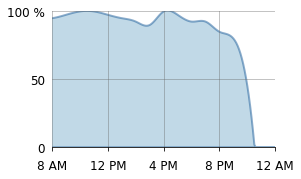

In [12]:
plot = street.get_flow_plot()

### USE CASE 5: Finding the charging stations nearby

Add a second EV charging station layer on an existing map with a controler.

**NOTE THAT: The python package `folium` doesn't support custom marker icons. But in our web app, we changed nice icons from javascript codes.**

In [13]:
map_recomm.add_ev_charger()
folium.LayerControl().add_to(map_recomm)
map_recomm

### USE CASE 6: Get the detailed info of a charging station

Users can check whether the connector type matches their vehicles in advance.

In [14]:
test = pa.EStation('Array Apartments')

In [15]:
print('Address:\t', test.address)
print('ZIP:\t\t', test.code)
print('Station Phone:\t', test.phone)
print('NEMA520:\t', test.NEMA520)
print('J1772:\t\t', test.J1772)
print('CHADEMO:\t', test.CHADEMO)
print('TESLA:\t\t', test.TESLA)
print('Level 1:\t', test.level1)
print('Level 2:\t', test.level2)
print('DC Fast:\t', test.dc)

Address:	 14027 Lake City Way NE
ZIP:		 98125
Station Phone:	 800-663-5633
NEMA520:	 0
J1772:		 1
CHADEMO:	 0
TESLA:		 0
Level 1:	 0
Level 2:	 1
DC Fast:	 0
